In [1]:
import torchvision.transforms.v2 as v2
from torch import optim
import torch 

from dlvc.models.cnn_opt import SimpleCNNTune, SimpleCNN, DeepCNN, DeepNormalizedCNN

from dlvc.evaluation import cifar_load, train_model_opt, test_model, save_metrics, plot_metrics

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

- Add More Convolutional Layers: Deeper networks can extract more complex features. However, overfitting can be a concern.

- Change Activation Function: ReLU is commonly used, but we can experiment with others like LeakyReLU, ELU, or SELU.

- Use Batch Normalization: Batch normalization can make the network faster and more stable.

- Adjust Dropout Rate: Dropout can help prevent overfitting.

- Use Different Optimizers: We could try Adam, RMSProp, or SGD.

- Learning Rate Scheduling: Decrease the learning rate over time.

- Data Augmentation: This can help prevent overfitting and improve the model's ability to generalize.

In [3]:
# # Load CIFAR-10 dataset
# transform_opt = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])

# train_data_opt, val_data_opt, test_data_opt = cifar_load(transform_opt)

# # Split dataset into training and validation sets
# val_size = int(0.2 * len(train_data_opt))
# train_data_opt_, val_data_opt_ = torch.utils.data.random_split(train_data_opt, [len(train_data_opt) - val_size, val_size])

# # Define DataLoader for training and validation sets
# train_loader_opt = DataLoader(train_data_opt_, batch_size=64, shuffle=False)
# val_loader_opt = DataLoader(val_data_opt_, batch_size=64, shuffle=False)
# test_loader_opt = DataLoader(test_data_opt, batch_size=64, shuffle=False)

# # Perform grid search for hyperparameter optimization
# best_val_accuracy = 0.0
# best_hyperparameters = None
# best_model = None
# results = []

# param_grid = {
#     'conv_filters': [[3, 6, 16]],  # Number of filters for each conv layer
#     'fc_neurons': [[16 * 5 * 5, 120, 84, 10], [16 * 5 * 5, 240, 168, 10]],  # Number of neurons for each fc layer
#     'activation_func': [nn.ReLU(), nn.Sigmoid()],  
#     'dropout_rate': [0.25, 0.5],  
#     'learning_rate': [0.001, 0.01]  
# }

# for i, params in enumerate(ParameterGrid(param_grid)):
    
#     model = SimpleCNNTune(conv_filters=params['conv_filters'], fc_neurons=params['fc_neurons'], activation_func=params['activation_func'], dropout_rate=params['dropout_rate'])
#     optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])

#     print(f'\n\n{i+1}/{len(ParameterGrid(param_grid))} Training model with hyperparameters: {params}')
    
#     name = model.__class__.__name__

#     for param in params:
#         name += "_"+param + "_" + str(params[param])
    
    
#     trainer = train_model_opt(model, optimizer, name)

#     trainer.train()

#     save_metrics(trainer, name, params)

#     model, test_metric = test_model(model, params)

#     plot_metrics(trainer, name)

#     if test_metric.accuracy() > best_val_accuracy:
#         best_val_accuracy = test_metric.accuracy()
#         best_hyperparameters = params
#         best_model = model

# print("Model:", best_model.__class__.__name__)
# print("Best model found with hyperparameters:", best_hyperparameters)
# print("Best validation accuracy:", best_val_accuracy)

In [4]:
# # Perform grid search for hyperparameter optimization

# param_grid = {
#     'random_crop': [True, False],
#     'left_right_mirror': [True, False],
#     'dropout_rate': [0.25, 0.5],
#     'weight_decay': [0.0001, 0.001]
# }

# best_model_name = None
# best_model = None
# best_model_accuracy = 0.0
# best_parameters = None


# for i, params in enumerate(ParameterGrid(param_grid)):
        
#     if params['random_crop'] == True and params['left_right_mirror'] == True:
#         transform = v2.Compose([
#             v2.ToImage(), 
#             v2.RandomHorizontalFlip(),
#             v2.RandomCrop(32, padding=4),
#             v2.ToDtype(torch.float32, scale=True),
#             v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
#         ])
#     elif params['random_crop'] == True and params['left_right_mirror'] == False:
#         transform = v2.Compose([
#             v2.ToImage(), 
#             v2.RandomCrop(32, padding=4),
#             v2.ToDtype(torch.float32, scale=True),
#             v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
#         ])
#     elif params['random_crop'] == False and params['left_right_mirror'] == True:
#         transform = v2.Compose([
#             v2.ToImage(), 
#             v2.RandomHorizontalFlip(),
#             v2.ToDtype(torch.float32, scale=True),
#             v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
#         ])
#     else:
#         transform = v2.Compose([
#             v2.ToImage(),
#             v2.ToDtype(torch.float32, scale=True),
#             v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
#         ])

#     train_data_opt, val_data_opt, test_data_opt = cifar_load(transform)

#     model = SimpleCNN(dropout_rate=params['dropout_rate'])

#     optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=params['weight_decay'])

#     print(f'\n\n{i+1}/{len(ParameterGrid(param_grid))} Training model with hyperparameters: {params}')

#     name = model.__class__.__name__

#     for param in params:
#         name += "_"+param + "_" + str(params[param])

#     trainer = train_model_opt(model, optimizer, name, train_data_opt, val_data_opt)

#     trainer.train()

#     save_metrics(trainer, model.__class__.__name__, params)

#     model, test_metric = test_model(model, params, test_data_opt)

#     plot_metrics(trainer, name)

#     if test_metric.accuracy() > best_model_accuracy:
#         best_model_accuracy = test_metric.accuracy()
#         best_parameters = params
#         best_model = model
#         best_model_name = name

# print("Model:", best_model_name)
# print("Best model found with parameters:", best_parameters)
# print("Best test accuracy:", best_model_accuracy)


In [5]:
dropout_rate = 0.5

weight_decay = 0.0001

lr_rate = 0.001

        
transform_train = v2.Compose([
    v2.ToImage(), 
    v2.RandomHorizontalFlip(),
    v2.RandomCrop(32, padding=4),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
])

transform_val = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
])

train_data_opt, val_data_opt, test_data_opt = cifar_load(transform_train, transform_val)




 Training model with hyperparameters: dropout_rate=0.5, weight_decay=0.0001 and learning_rate=0.001

Training model:  SimpleCNN

TRAIN, EPOCH: 0 
Loss: 2.348663568496704
Accuracy: 0.113
Class Accuracy: 0.11297269500792026

VALIDATION, EPOCH: 0 
Loss: 2.2430050373077393
Accuracy: 0.1541
Class Accuracy: 0.1536036771722138
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 1 
Loss: 2.1405997276306152
Accuracy: 0.1406
Class Accuracy: 0.14005093239247798

VALIDATION, EPOCH: 1 
Loss: 2.1287107467651367
Accuracy: 0.2096
Class Accuracy: 0.20834499304182827
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 2 
Loss: 2.3712053298950195
Accuracy: 0.1807
Class Accuracy: 0.1806403487920761

VALIDATION, EPOCH: 2 
Loss: 1.915793538093567
Accuracy: 0.2337
Class Accuracy: 0.23305878120008855
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 3 
Loss: 1.970

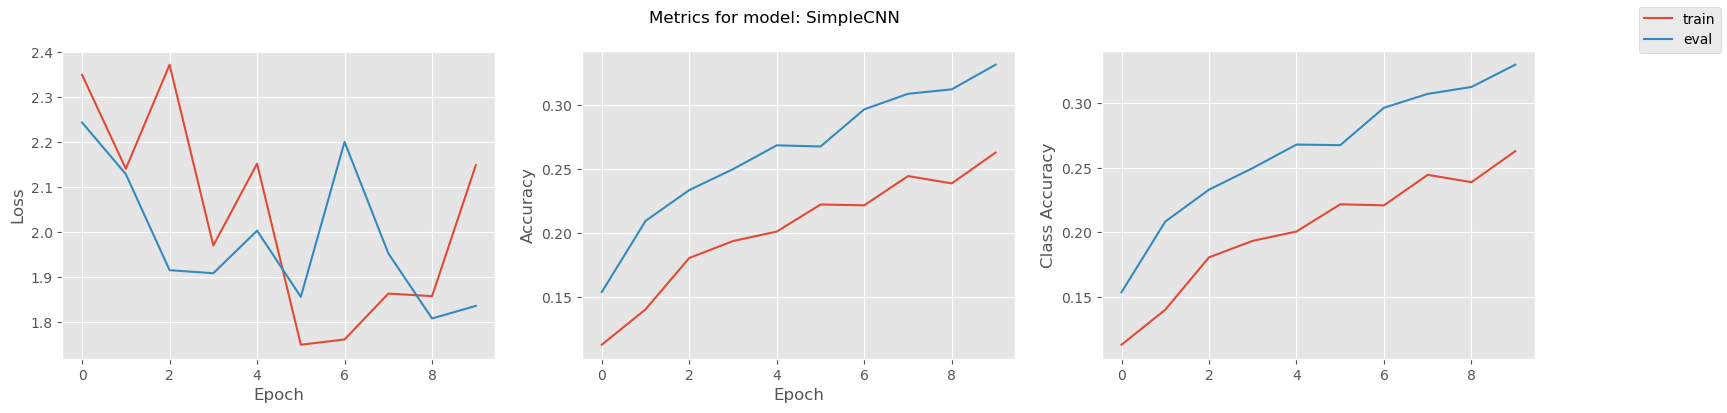

In [6]:
# Perform grid search for hyperparameter optimization
model = SimpleCNN(dropout_rate=dropout_rate)

optimizer = optim.Adam(model.parameters(), lr=lr_rate, weight_decay=weight_decay)

print(f'\n\n Training model with hyperparameters: dropout_rate={dropout_rate}, weight_decay={weight_decay} and learning_rate={lr_rate}')

name = model.__class__.__name__

trainer = train_model_opt(model, optimizer, name, train_data_opt, val_data_opt)

trainer.train()

save_metrics(trainer, name)

model, test_metric = test_model(model, name, test_data_opt)

plot_metrics(trainer, name)



 Training model with hyperparameters: dropout_rate=0.5, weight_decay=0.0001 and learning_rate=0.001

Training model:  DeepCNN

TRAIN, EPOCH: 0 
Loss: 2.3521013259887695
Accuracy: 0.1795
Class Accuracy: 0.17896648347377778

VALIDATION, EPOCH: 0 
Loss: 1.741685152053833
Accuracy: 0.3198
Class Accuracy: 0.31974007999524473
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 1 
Loss: 2.0262210369110107
Accuracy: 0.291
Class Accuracy: 0.2901139110326767

VALIDATION, EPOCH: 1 
Loss: 1.6977438926696777
Accuracy: 0.3437
Class Accuracy: 0.34277949407696723
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 2 
Loss: 1.5430856943130493
Accuracy: 0.3199
Class Accuracy: 0.3196601137518883

VALIDATION, EPOCH: 2 
Loss: 1.8379313945770264
Accuracy: 0.3437
Class Accuracy: 0.34276268184185027
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 3 
Loss: 1.6961

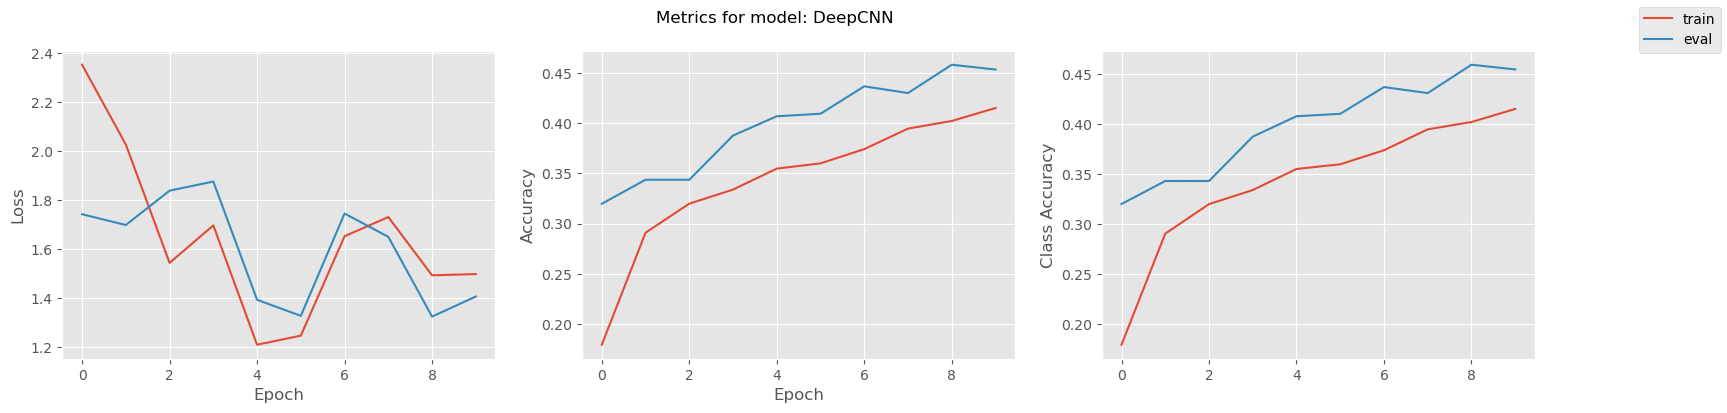

In [7]:
# Perform grid search for hyperparameter optimization
model = DeepCNN(dropout_rate=dropout_rate)

optimizer = optim.Adam(model.parameters(), lr=lr_rate, weight_decay=weight_decay)

print(f'\n\n Training model with hyperparameters: dropout_rate={dropout_rate}, weight_decay={weight_decay} and learning_rate={lr_rate}')

name = model.__class__.__name__

trainer = train_model_opt(model, optimizer, name, train_data_opt, val_data_opt)

trainer.train()

save_metrics(trainer, name)

model, test_metric = test_model(model, name, test_data_opt)

plot_metrics(trainer, name)



 Training model with hyperparameters: dropout_rate=0.5, weight_decay=0.0001 and learning_rate=0.001

Training model:  DeepNormalizedCNN

TRAIN, EPOCH: 0 
Loss: 1.6820104122161865
Accuracy: 0.2694
Class Accuracy: 0.26964321583509443

VALIDATION, EPOCH: 0 
Loss: 1.6074765920639038
Accuracy: 0.3088
Class Accuracy: 0.3093743145465851
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 1 
Loss: 1.476676344871521
Accuracy: 0.3591
Class Accuracy: 0.35977372229099275

VALIDATION, EPOCH: 1 
Loss: 2.0802295207977295
Accuracy: 0.365
Class Accuracy: 0.3642546094954014
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 2 
Loss: 1.8053014278411865
Accuracy: 0.3971
Class Accuracy: 0.3976296380162239

VALIDATION, EPOCH: 2 
Loss: 1.790634036064148
Accuracy: 0.3959
Class Accuracy: 0.397245366871357
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 3 
Loss: 

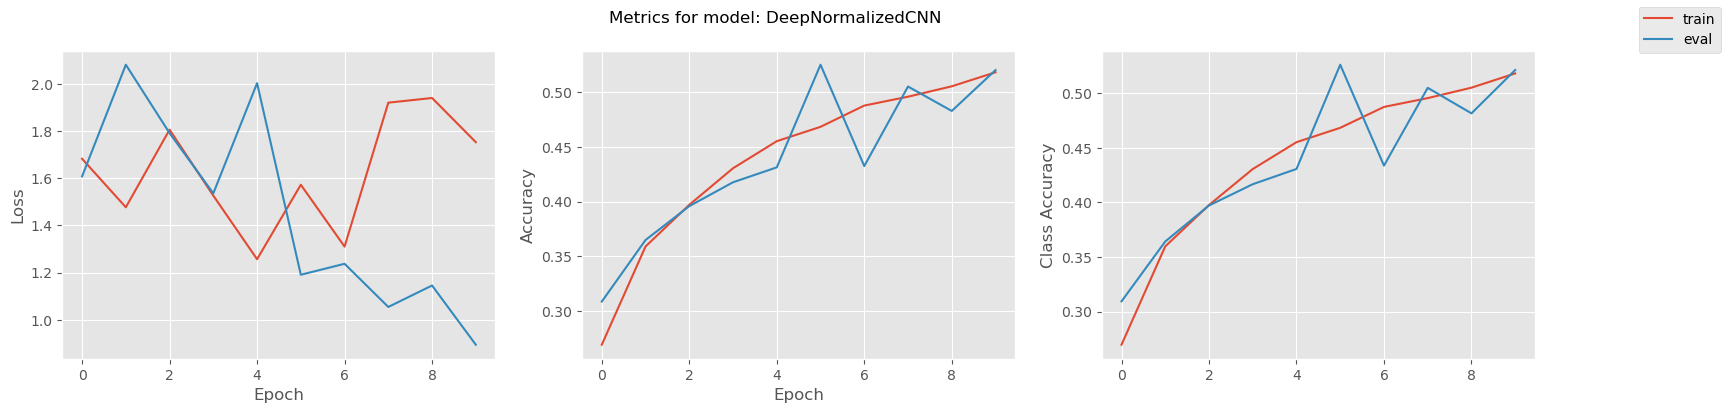

In [8]:
# Perform grid search for hyperparameter optimization
model = DeepNormalizedCNN(dropout_rate=dropout_rate)

optimizer = optim.Adam(model.parameters(), lr=lr_rate, weight_decay=weight_decay)

print(f'\n\n Training model with hyperparameters: dropout_rate={dropout_rate}, weight_decay={weight_decay} and learning_rate={lr_rate}')

name = model.__class__.__name__

trainer = train_model_opt(model, optimizer, name, train_data_opt, val_data_opt)

trainer.train()

save_metrics(trainer, name)

model, test_metric = test_model(model, name, test_data_opt)

plot_metrics(trainer, name)